<a href="https://colab.research.google.com/github/NatashaKamami/Music-Recommendation-System/blob/main/Music_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text Handling libraries
import spacy
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Scikit Learn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
# Loading the dataset
songs_data = pd.read_csv('/content/song_data.csv')

songs_data.head()

,track_id,artist_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100,156943,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
1,0yLdNVWF3Srea0uzk55zFn,Miley Cyrus,Flowers,100,200455,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,4,pop
2,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
3,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,98,162637,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
4,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),98,175238,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop


##**EDA**

In [3]:
# Overview of the data
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4993 non-null   object 
 1   artist_name       4993 non-null   object 
 2   track_name        4993 non-null   object 
 3   popularity        4993 non-null   int64  
 4   duration_ms       4993 non-null   int64  
 5   danceability      4993 non-null   float64
 6   energy            4993 non-null   float64
 7   key               4993 non-null   int64  
 8   loudness          4993 non-null   float64
 9   mode              4993 non-null   int64  
 10  speechiness       4993 non-null   float64
 11  acousticness      4993 non-null   float64
 12  instrumentalness  4993 non-null   float64
 13  liveness          4993 non-null   float64
 14  valence           4993 non-null   float64
 15  tempo             4993 non-null   float64
 16  time_signature    4993 non-null   int64  


### **1. Summary Statistics**

In [4]:
# summary statistics of the numeric columns
songs_data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,75.102143,213026.662928,0.638407,0.650364,5.290006,-6.666660,0.605848,0.092332,0.245814,0.027093,0.179747,0.513129,120.963490,3.927699
std,4.738894,54803.268272,0.150198,0.187871,3.591246,3.131385,0.488717,0.092580,0.261364,0.123430,0.141957,0.232155,28.475106,0.357189
min,70.000000,51914.000000,0.000000,0.000020,0.000000,-40.449000,0.000000,0.000000,0.000005,0.000000,0.021000,0.000000,0.000000,0.000000
25%,71.000000,178888.000000,0.540000,0.531000,2.000000,-8.065000,0.000000,0.036400,0.031200,0.000000,0.094200,0.335000,99.042000,4.000000
50%,74.000000,207719.000000,0.651000,0.672000,5.000000,-6.097000,1.000000,0.053200,0.144000,0.000002,0.122000,0.507000,120.005000,4.000000
75%,78.000000,238253.000000,0.748000,0.797000,8.000000,-4.662000,1.000000,0.105000,0.394000,0.000263,0.221000,0.696000,139.902000,4.000000
max,100.000000,643200.000000,0.980000,0.996000,11.000000,1.295000,1.000000,0.724000,0.996000,1.000000,0.979000,0.979000,210.164000,5.000000


### **2. Correlation heatmap**

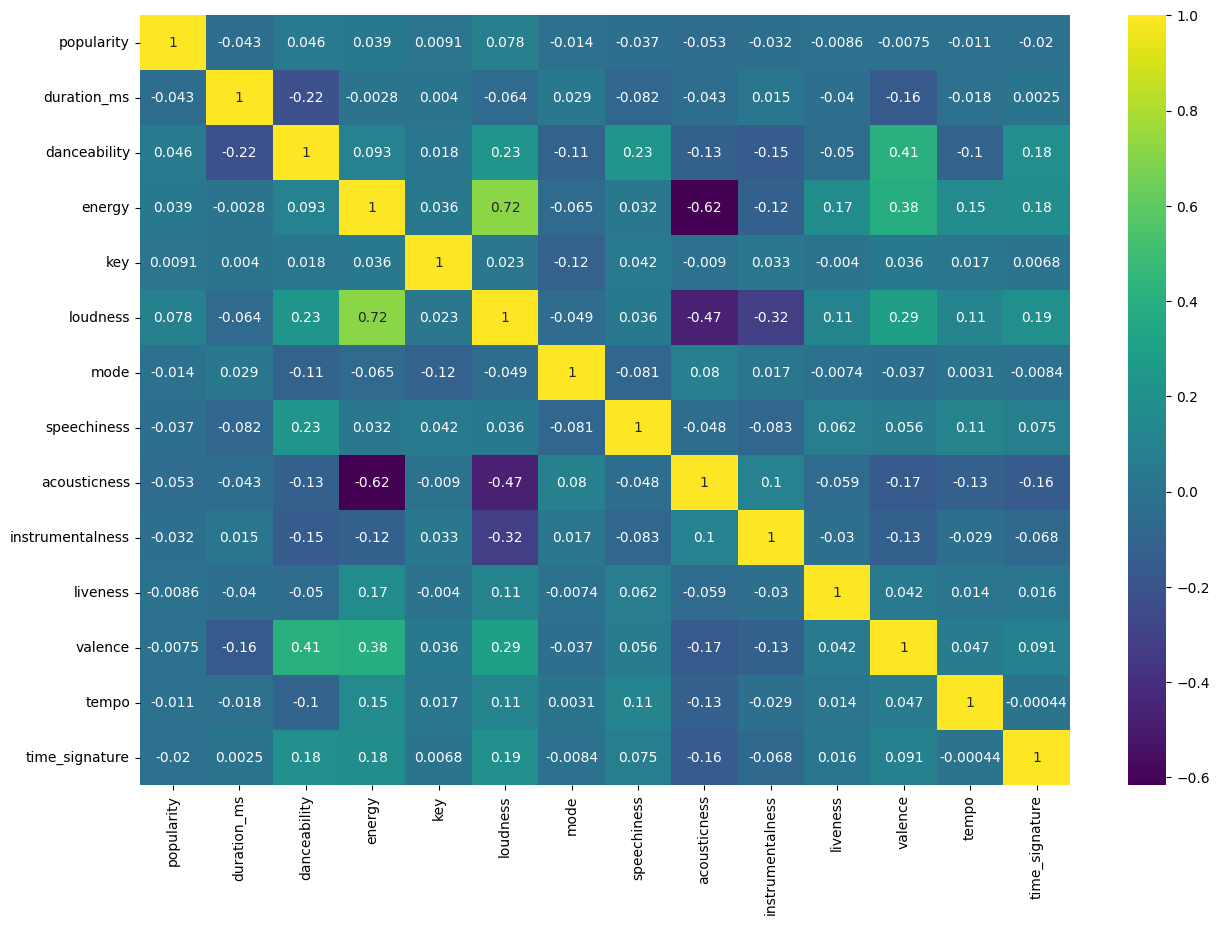

In [5]:
# Heatmap to show correlation between factors
plt.figure(figsize=(15,10))
sns.heatmap(songs_data.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()

There exists a significantly strong positive relationship between energy and loudness which means that songs with high loudness also tend to be more energetic and vice versa.
Another notable relationship is the strong negative relationship between energy and acousticness meaning that songs with high acousticness tend to have low energy and vice versa.
From this we can infer that since energy and loudness have a strong positive relationship and energy and acousticness have a strong negative rellationship then we also expect loudness and acousticness to have a negative relationship as absovered in the heatma.

### **3. Most popular genres**

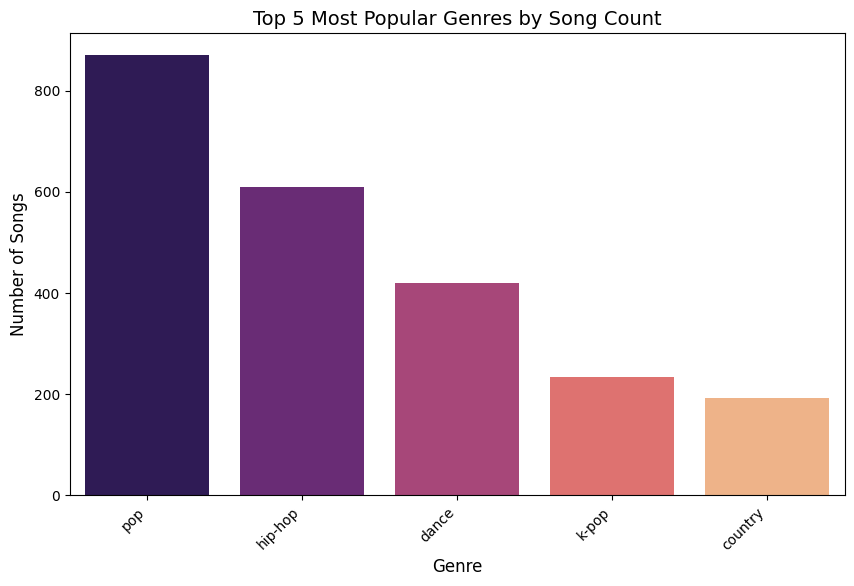

In [5]:
## Visualising the most popular genres according to song count
# Count the number of songs per genre
genre_counts = songs_data['genre'].value_counts()

# Select the top 5 most frequent genres
top_5_genres = genre_counts.head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_genres.index, y=top_5_genres.values, hue=top_5_genres.index, palette='magma')
plt.title('Top 5 Most Popular Genres by Song Count', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


Seeing as our dataset is made up of songs with a popularity of 70 and above (meaning our songs are already popular), the above distribution visualizes the genres with the highest number of popular songs i.e the most popular genres and the pop genre is seen to have the highest popularity

The plot will highlight the five genres that appear most frequently in the dataset.
If a genre dominates, it suggests a strong listener preference or a bias in the dataset.

ou can see if the distribution is balanced or if a few genres have significantly more songs.
If one genre has far more songs than others, it might indicate its dominance in the music industry or dataset.

We can see that the most popular songs wer Flowers by Miley and Unholy by sam smith and kimpetras with a popularity of 100 and they are both under the pop genre further proving that pop is the most popular genre in the dataset

### **4. Track duration distribution**

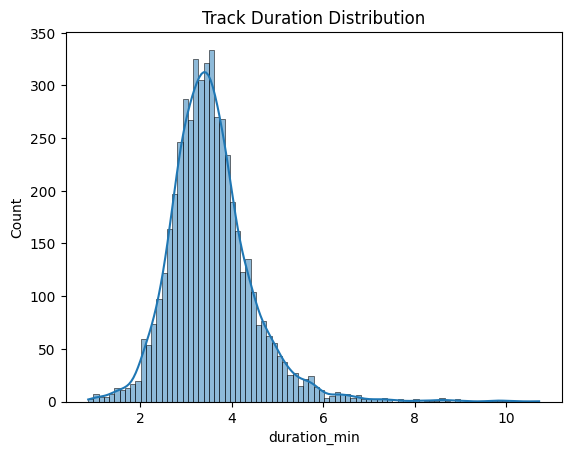

In [8]:
# distribution of track duration
songs_data['duration_min'] = songs_data['duration_ms'] / 60000
sns.histplot(songs_data['duration_min'], kde=True)
plt.title('Track Duration Distribution')
plt.show()


The histogram shows where most songs fall in terms of duration.
We observe a peak around 3-4 minutes, which aligns with the common duration for most popular songs.
The normal distribution suggests that most songs have similar lengths but there exists a few outliers representing very long song durations.

### **5. Most common keys**

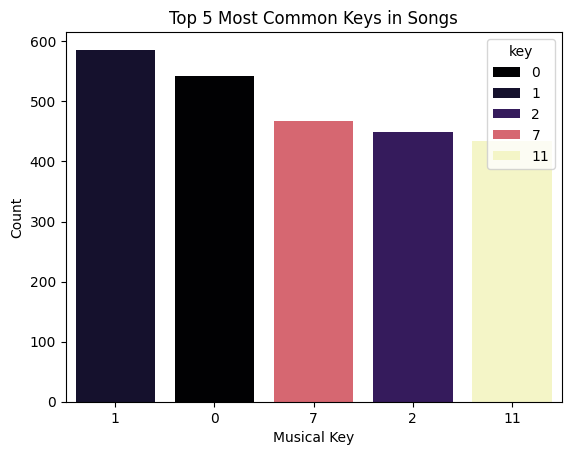

In [7]:
key_counts = songs_data['key'].value_counts().nlargest(5).sort_values(ascending=False)

# Select the top 5 most frequent genres
top_5_keys = key_counts.head(5)

sns.barplot(x=top_5_keys.index, y=top_5_keys.values, hue=top_5_keys.index, palette='magma', order=key_counts.index)
plt.title('Top 5 Most Common Keys in Songs')
plt.xlabel('Musical Key')
plt.ylabel('Count')
plt.show()


The barchart shows the most frequent musical keys in the dataset which helps in understanding if certain keys are preferred in popular music. We can see that the most popular keys are keys 1, 0, 7, 2 and 11 which represent:
- 0 → C major (or A minor)
- 1 → C# major / Db major (or A# minor / Bb minor)
- 2 → D major (or B minor)
- 7 → G major (or E minor)
- 11 → B major (or G# minor)

C major and  G major are often the most common keys in pop music and seeing as our dataset is dominated by songs of the pop genre, its no surprise that they appear in the top 5 keys



### **6. Artists with the most songs**

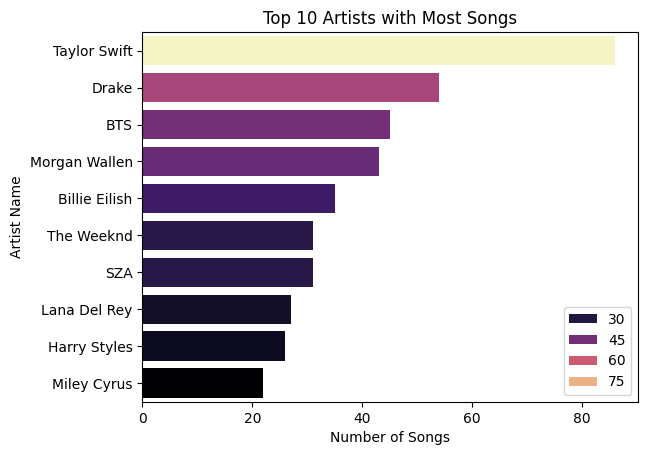

In [8]:
## artists with the most popular songs
top_artists = songs_data['artist_name'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values, hue=top_artists.values, palette='magma')
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()


The above visualization shows the artists with the most tracks in the dataset which helps us in identifying which artists tend to release music that people find popular.

### **7. Distribution of song tempo**

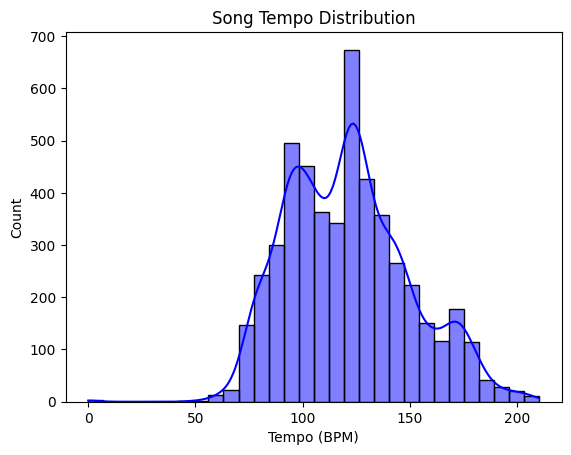

In [9]:
sns.histplot(songs_data['tempo'], bins=30, kde=True, color='blue')
plt.title('Song Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Count')
plt.show()


The distribution shows common BPM (beats per minute) values and this helps us to determine whether songs follow standard slow, medium, or fast tempos. We observe peaks at 100 and 150 which means that most popular songs have tempo/BPM between this range.

### **8. Word cloud object**

In [13]:
# !python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
data = pd.DataFrame(songs_data[['track_name', 'genre']])

# Load Spacy model
nlp = spacy.load('en_core_web_sm')

#Function to clean the columns
def clean_text(text):

  #Convert text to lowercase
  text = text.lower()

  #Process text using spacy
  doc = nlp(text)

  #Lemmatization and removing stop words and punctuation
  cleaned_text = " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

  return cleaned_text

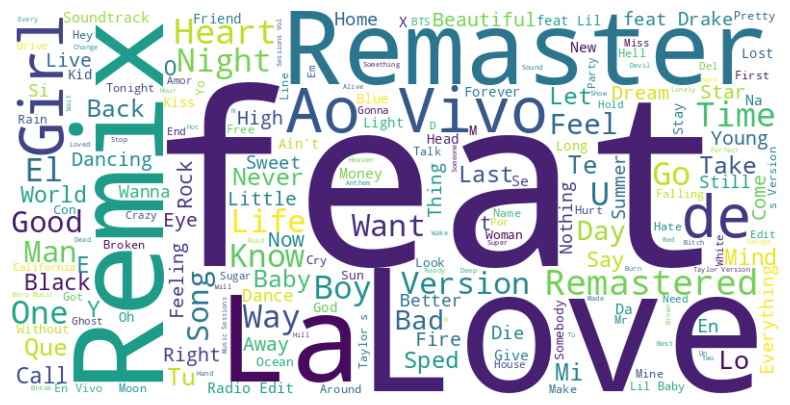

In [15]:
#Creating a word cloud
text = ' '.join(data['track_name'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud object helps us to identify common themes in song titles. Words like feat, love, remix and remaster are the words that appear frequently in the song titles of this dataset.
This means that most songs in the dataset have love related themes or are remixes, collaborations, or remastered versions of a song.

This is in line with popular songs since a lot of love songs tend to be popular, remixes and collaborations also tend to be popular since they include more than one artists bring together fans from the different artists leading to the songs being popular and also remastered versions of songs tend to be popular since they have been mordernized, improved and of a better quality which makes them popular to listeners.

# **Modelling**

## **1. Feature Scaling**

In [16]:
# preprocessing numeric features
# Define numeric features
numeric_features = ['popularity', 'duration_ms', 'key', 'loudness', 'tempo', 'time_signature']
scaler = MinMaxScaler()

# Scale the numeric features
scaled_features = scaler.fit_transform(songs_data[numeric_features])

# Define numeric features that do not need scaling
unscaled_numeric_features = ['danceability', 'energy', 'speechiness', 'mode', 'acousticness',
                             'instrumentalness', 'liveness', 'valence']

# Extract unscaled numeric features
unscaled_features = songs_data[unscaled_numeric_features].values

# Combine scaled and unscaled numeric features
all_numeric_features = np.hstack([scaled_features, unscaled_features])

print("Numeric features scaled and combined.")

Numeric features scaled and combined.


## **2. Text tokenization**

In [17]:
# Tokenizing text data(track name, artist name and genre)
# Download the punkt tokenizer (you can skip if already downloaded)
nltk.download('punkt_tab')

# Tokenize the track names, genres, and artist names
def tokenize_text(text):
    return word_tokenize(text.lower())

songs_data['track_name_tokens'] = songs_data['track_name'].apply(tokenize_text)
songs_data['genre_tokens'] = songs_data['genre'].apply(tokenize_text)
songs_data['artist_name_tokens'] = songs_data['artist_name'].apply(tokenize_text)

# Combine track name, genre, and artist name tokens for better word representation
songs_data['combined_tokens'] = songs_data['track_name_tokens'] + songs_data['genre_tokens'] + songs_data['artist_name_tokens']

print("Text tokenization completed.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Text tokenization completed.


## **3. Text Vectorization with Word2Vec**

In [18]:
# Train Word2Vec model on the tokenized data
model = Word2Vec(songs_data['combined_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get vector representation for each song (by averaging token vectors)
def get_song_vector(tokens):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no valid tokens

# Apply to each song
songs_data['song_vector'] = songs_data['combined_tokens'].apply(get_song_vector)
song_vectors = np.array(songs_data['song_vector'].tolist())

# Stack text-based and numeric features together
combined_features = np.hstack([song_vectors, all_numeric_features])

print("Word2Vec model training completed.")

Word2Vec model training completed.


## **4. Cosine Similarity calculation**

In [19]:
# Compute cosine similarity based on combined features
cosine_sim_matrix = cosine_similarity(combined_features)

# Create a DataFrame to map song indices with similarity scores
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=songs_data['track_name'], columns=songs_data['track_name'])


## **5. Making recommendations**

In [24]:
# Creating a recommendation system
def get_recommendations(query, cosine_sim_matrix, songs_data, top_n=5):
    if query in songs_data['track_name'].values:
        # Song-based recommendation: Get index of the song
        idx = songs_data.index[songs_data['track_name'] == query].tolist()[0]

        # Get the pairwise similarity scores of all songs with that song
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))

        # Sort the songs based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the most similar songs (exclude the song itself)
        song_indices = [i[0] for i in sim_scores if i[0] != idx][:top_n]

        # Return the recommendations with track_name, artist_name, and genre
        recommendations = songs_data[['track_name', 'artist_name', 'genre']].iloc[song_indices]
        return recommendations

    # Check if the query is an artist name
    elif query in songs_data['artist_name'].values:
        # Artist-based recommendation: Get all songs by this artist
        artist_songs = songs_data[songs_data['artist_name'] == query]
        idx_list = artist_songs.index.tolist()

        # Get the pairwise similarity scores of all songs by this artist
        sim_scores = []
        for idx in idx_list:
            sim_scores.extend(list(enumerate(cosine_sim_matrix[idx])))

        # Sort the songs based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the most similar songs (exclude original songs by this artist)
        song_indices = [i[0] for i in sim_scores if i[0] not in idx_list][:top_n]

        # Return the recommendations with track_name, artist_name, and genre
        recommendations = songs_data[['track_name', 'artist_name', 'genre']].iloc[song_indices]

        # Return recommendations (if any)
        if len(recommendations) == 0:
            return f"No recommendations found for artist '{query}' based on similarity."
        return recommendations

    else:
        return f"'{query}' not found in the dataset."


# Example usage: Get recommendations based on artist name
artist_name = 'Sufjan Stevens'
recommended_songs_artist = get_recommendations(artist_name, cosine_sim_matrix, songs_data)
print("Top songs similar to songs by the artist :\n", recommended_songs_artist)

# Example usage: Get recommendations for a song
song_name = 'Fourth of July'
recommended_songs = get_recommendations(song_name, cosine_sim_matrix, songs_data)
print("Top similar songs :\n", recommended_songs)

Top songs similar to songs by the artist :
                            track_name    artist_name        genre
957                     Cinnamon Girl   Lana Del Rey          pop
3597      Call It Fate, Call It Karma    The Strokes  alternative
4272                          It's Ok  Tom Rosenthal      british
3632                        Treehouse         Alex G    indie-pop
3349  Killing Me Softly With His Song  Roberta Flack         soul
Top similar songs :
                track_name     artist_name       genre
154   everything i wanted   Billie Eilish     electro
3717      Mystery of Love  Sufjan Stevens  songwriter
552        rises the moon    Liana Flores   indie-pop
4272              It's Ok   Tom Rosenthal     british
2443              I Found       Amber Run        folk


## **6. Incoorporating a simple Deep Learning for better recommendations**

In [21]:
# Define the neural network model (input shape is now the combined feature size)
model = Sequential([
    Dense(128, activation='relu', input_shape=(combined_features.shape[1],)),  # Updated input shape
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(combined_features.shape[1], activation='linear')  # Output same as input (autoencoder)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with combined features
model.fit(combined_features, combined_features, epochs=30, batch_size=32, validation_split=0.2)

print("Deep learning model trained.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0305 - val_loss: 0.0050
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0021 - val_loss: 9.5372e-04
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - val_loss: 8.7178e-04
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0018 - val_loss: 7.9710e-04
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018 - val_loss: 7.6967e-04
Epoch 12/30
125/125 ━━━━━━━━━━━━━━

In [22]:
# Recommendation function
def recommend_nn(query, songs_data, model, combined_features, song_vectors, top_n=5):
    if query not in songs_data['track_name'].values and query not in songs_data['artist_name'].values:
        return f"'{query}' not found in dataset."

    if query in songs_data['track_name'].values:
        # Song-based recommendation: Get the index of the song
        song_idx = songs_data.index[songs_data['track_name'] == query].tolist()[0]
        song_vector = combined_features[song_idx].reshape(1, -1)

        # Predict new vector representation
        predicted_vector = model.predict(song_vector)

        # Compute cosine similarity
        similarities = cosine_similarity(predicted_vector, combined_features)
        similar_indices = similarities.argsort()[0][-top_n-1:-1]  # Exclude the input song

        # Return top N recommendations
        return songs_data.iloc[similar_indices][['track_name', 'artist_name', 'genre']]

    elif query in songs_data['artist_name'].values:
        # Artist-based recommendation: Get all songs by this artist
        artist_songs = songs_data[songs_data['artist_name'] == query]
        artist_indices = artist_songs.index.tolist()

        # Predict vector for all songs by this artist
        artist_features = combined_features[artist_indices]
        predicted_vectors = model.predict(artist_features)

        # Compute cosine similarity for all artist songs with all other songs
        similarities = cosine_similarity(predicted_vectors, combined_features)

        # Get top N similar songs per song (from artist)
        similar_indices = similarities.argsort(axis=1)[:, -top_n-1:-1]  # Exclude the input songs

        # Collect recommendations (limiting to top N for each artist song)
        recommended_songs = []
        for idx_list in similar_indices:
            recommended_songs.extend(songs_data.iloc[idx_list][['track_name', 'artist_name', 'genre']].values)

        # Convert recommended_songs to DataFrame
        recommended_songs_df = pd.DataFrame(recommended_songs, columns=['track_name', 'artist_name', 'genre'])

        # Drop duplicate rows based on all columns and limit to top N unique songs
        recommendations = recommended_songs_df.drop_duplicates().head(top_n)

        return recommendations


# Example usage:
print(recommend_nn("Fourth of July", songs_data, model, combined_features, song_vectors))
print(recommend_nn("Sufjan Stevens", songs_data, model, combined_features, song_vectors))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
              track_name     artist_name              genre
3304       Liquid Smooth          Mitski          indie-pop
4272             It's Ok   Tom Rosenthal            british
651       Fourth of July  Sufjan Stevens  singer-songwriter
1854  Yebba’s Heartbreak           Drake                pop
1439          Your Power   Billie Eilish            electro
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
           track_name     artist_name              genre
0       Liquid Smooth          Mitski          indie-pop
1             It's Ok   Tom Rosenthal            british
2      Fourth of July  Sufjan Stevens  singer-songwriter
3  Yebba’s Heartbreak           Drake                pop
4          Your Power   Billie Eilish            electro


### **Evaluating performance of the deep learning model**

In [23]:
# Predict the reconstructed combined features
predicted_features = model.predict(combined_features)

# Calculate MSE (on the combined features)
mse = mean_squared_error(combined_features, predicted_features)
print(f"Deep learning Model MSE: {mse}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Deep learning Model MSE: 0.00044256166721355806
